In [70]:
#importing several helpful packages
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from builtins import list
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns

import datetime

%matplotlib inline

In [71]:
Mehak_df=pd.read_csv(r'C:\Users\mehak\OneDrive\Desktop\MBA  LPU\Assignments\Semester 2\Questions\CA 1\INTM\My Uber Drives 2016.csv')
Mehak_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [72]:
Mehak_df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [73]:
#deleting unnecessary data aka the last row
Mehak_df=Mehak_df[:-1]
Mehak_df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [74]:
#checking for duplicate records
Mehak_df[Mehak_df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [75]:
#deleting the duplicate record
Mehak_df.drop_duplicates(inplace=True)

In [76]:
#getting information about the dataset
Mehak_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1154 non-null   object 
 1   END_DATE*    1154 non-null   object 
 2   CATEGORY*    1154 non-null   object 
 3   START*       1154 non-null   object 
 4   STOP*        1154 non-null   object 
 5   MILES*       1154 non-null   float64
 6   PURPOSE*     652 non-null    object 
dtypes: float64(1), object(6)
memory usage: 72.1+ KB


In [77]:
Mehak_df.columns = ['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE']
print(Mehak_df.columns);

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')


In [9]:
#the start and end dates should be in date format, however, they are shown as object. 
#this needs to be fixed before proceeding with the data analysis
Mehak_df['START_DATE'] = pd.to_datetime(Mehak_df['START_DATE'])
Mehak_df['END_DATE'] = pd.to_datetime(Mehak_df['END_DATE'])
Mehak_df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1154 non-null   datetime64[ns]
 1   END_DATE    1154 non-null   datetime64[ns]
 2   CATEGORY    1154 non-null   object        
 3   START       1154 non-null   object        
 4   STOP        1154 non-null   object        
 5   MILES       1154 non-null   float64       
 6   PURPOSE     652 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.1+ KB


In [78]:
#checking for cancelled rides or rides where the duration is zero
filtered_data = Mehak_df[Mehak_df["END_DATE"]==Mehak_df["START_DATE"]]
print(filtered_data)

           START_DATE          END_DATE  CATEGORY             START  \
751  09-06-2016 17:49  09-06-2016 17:49  Business  Unknown Location   
761    9/16/2016 7:08    9/16/2016 7:08  Business  Unknown Location   
798  10-08-2016 15:03  10-08-2016 15:03  Business           Karachi   
807  10/13/2016 13:02  10/13/2016 13:02  Business         Islamabad   

                 STOP  MILES PURPOSE  
751  Unknown Location   69.1     NaN  
761  Unknown Location    1.6     NaN  
798           Karachi    3.6     NaN  
807         Islamabad    0.7     NaN  


In [81]:
len(filtered_data)

4

In [13]:
#creating a new dataframe for analysis pruposes
AdjMehak_df = Mehak_df

In [14]:
#dropping the rows where the rides are cancelled
AdjMehak_df.drop([751,761,798,807], axis=0, inplace=True)

In [15]:
AdjMehak_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1150 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1150 non-null   datetime64[ns]
 1   END_DATE    1150 non-null   datetime64[ns]
 2   CATEGORY    1150 non-null   object        
 3   START       1150 non-null   object        
 4   STOP        1150 non-null   object        
 5   MILES       1150 non-null   float64       
 6   PURPOSE     652 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 71.9+ KB


In [21]:
sns.set_style="whitegrid"

In [22]:
Category_labels = AdjMehak_df.CATEGORY.value_counts()
print(Category_labels);

Business    1073
Personal      77
Name: CATEGORY, dtype: int64


Text(0.5, 1.0, 'Number of trips for each category')

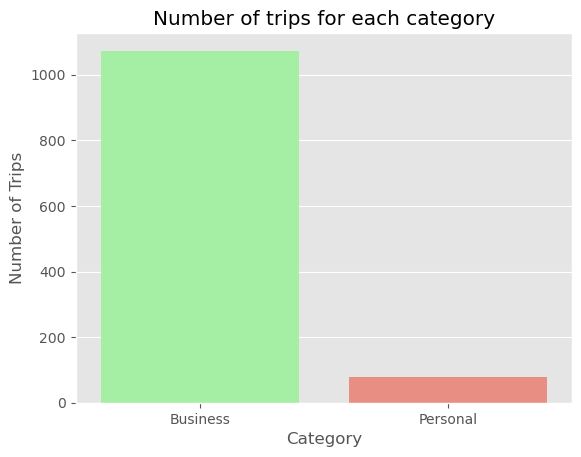

In [23]:
#number of trips for category
sns.barplot(x=Category_labels.index, y=Category_labels, palette = ['palegreen','salmon'])
plt.xlabel('Category')
plt.ylabel('Number of Trips')
plt.title('Number of trips for each category')

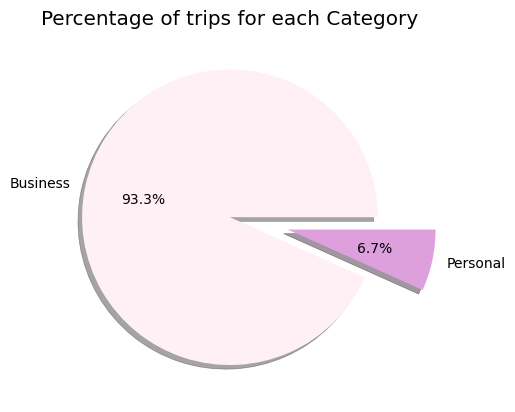

In [35]:
#percentage for each category
category_value = AdjMehak_df['CATEGORY'].value_counts()
labels_category=category_value.index
explode = (0,0.4)
colors = ('lavenderblush','plum')
plt.pie(category_value, labels=labels_category, explode = explode, colors = colors, autopct='%1.1f%%', shadow=True)
plt.title("Percentage of trips for each Category");

In [26]:
#checking thr color palette
sns.color_palette()

[(0.8862745098039215, 0.2901960784313726, 0.2),
 (0.20392156862745098, 0.5411764705882353, 0.7411764705882353),
 (0.596078431372549, 0.5568627450980392, 0.8352941176470589),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.984313725490196, 0.7568627450980392, 0.3686274509803922),
 (0.5568627450980392, 0.7294117647058823, 0.25882352941176473),
 (1.0, 0.7098039215686275, 0.7215686274509804)]

In [27]:
#changing color palette
sns.set_palette("pastel")
sns.color_palette()

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

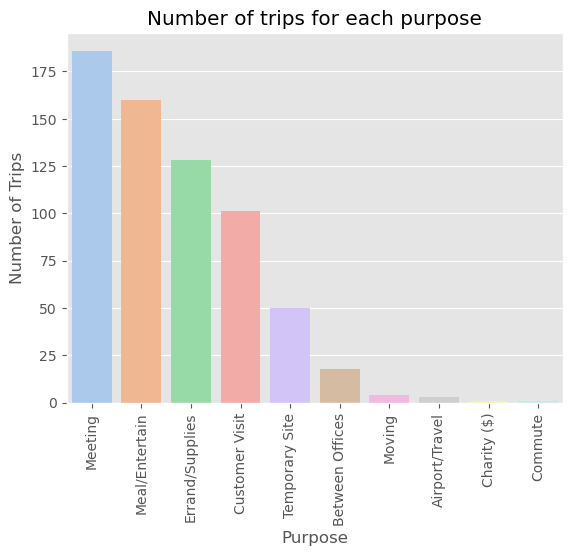

In [31]:
#number of trips for each purpose
purpose_labels = AdjMehak_df.PURPOSE.value_counts()
sns.barplot(x=purpose_labels.index, y=purpose_labels)
plt.xlabel('Purpose')
plt.ylabel('Number of Trips')
plt.title('Number of trips for each purpose');
plt.xticks(rotation=90);

In [43]:
#extracting month from start date
AdjMehak_df['MONTH'] = pd.DatetimeIndex(AdjMehak_df['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep',
      10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec' }
AdjMehak_df["MONTH"] = AdjMehak_df.MONTH.map(month_label)
AdjMehak_df.MONTH.unique()

array(['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

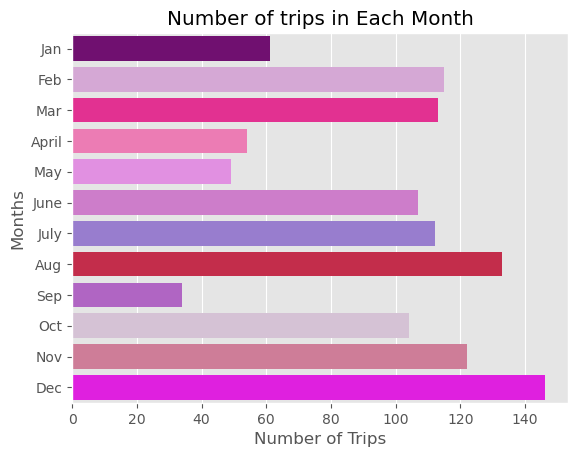

In [44]:
# plot number of trips at each month
month_count =AdjMehak_df.MONTH.value_counts()
colors = ('purple','plum','deeppink','hotpink','violet','orchid','mediumpurple','crimson','mediumorchid','thistle','palevioletred','magenta')
sns.barplot( x=month_count, y=month_count.index, order=['Jan','Feb','Mar','April','May','June','July','Aug','Sep','Oct','Nov','Dec'], palette = colors);
plt.xlabel('Number of Trips')
plt.ylabel('Months')
plt.title('Number of trips in Each Month');

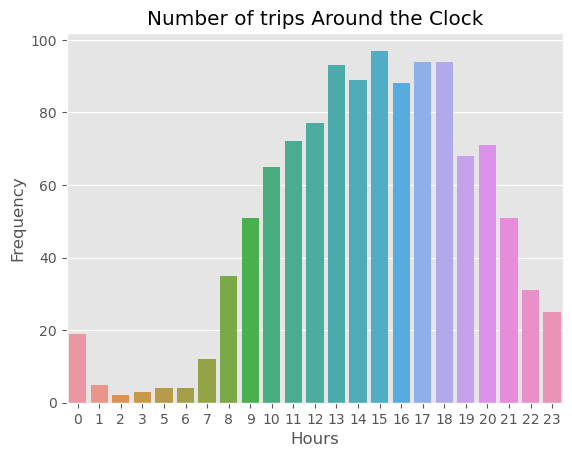

In [45]:
# I need to see how many trip made at each clock and as you see the clock which has the higest number of trips
hours = AdjMehak_df['START_DATE'].dt.hour.value_counts()
sns.barplot(x=hours.index, y=hours)
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Around the Clock');

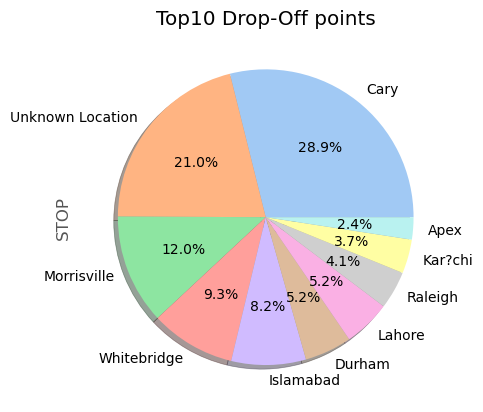

In [66]:
months = AdjMehak_df['STOP'].value_counts().nlargest (10) 
months.plot(kind='pie',autopct='%1.1f%%', shadow=True)
plt.title('Top10 Drop-Off points');

In [47]:
# calculate duration of each trip in minutes
minutes=[]
AdjMehak_df['DURATION_MINS'] = AdjMehak_df['END_DATE'] - AdjMehak_df['START_DATE']
AdjMehak_df['DURATION_MINS']
for x in AdjMehak_df['DURATION_MINS']:
    minutes.append(x.seconds / 60)

AdjMehak_df['DURATION_MINS'] = minutes

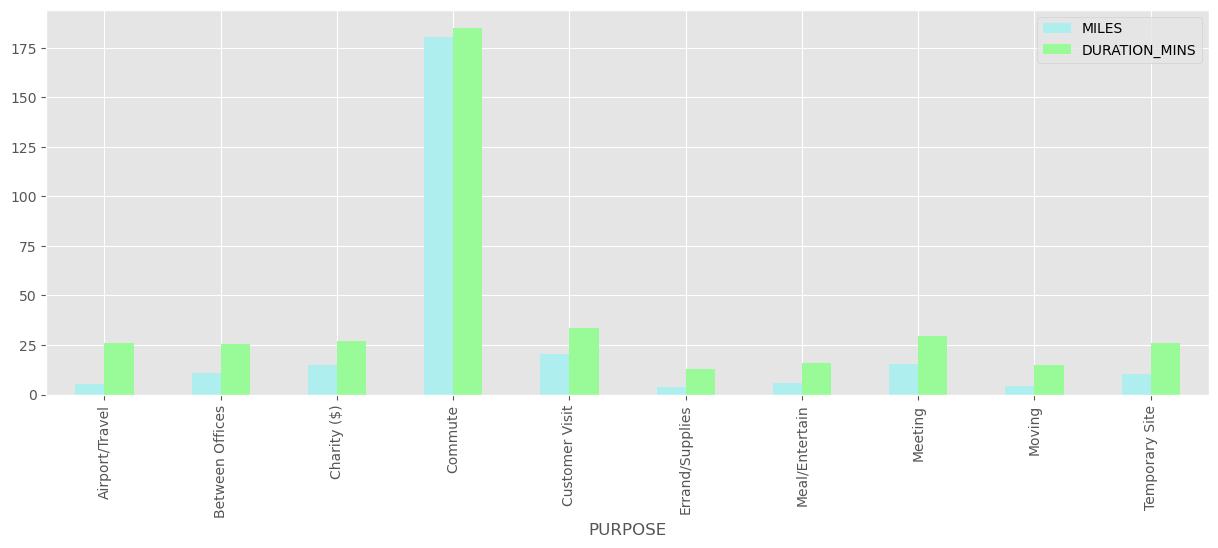

In [48]:
#average time and distance sorted by purpose
purpose = AdjMehak_df.groupby('PURPOSE').mean()
purpose.plot(kind = 'bar',figsize=(15,5), color = ('paleturquoise', 'palegreen'));

In [49]:
# calculate trip speed for each driver
AdjMehak_df['DURATION_HOURS'] = AdjMehak_df['DURATION_MINS'] / 60
AdjMehak_df['SPEED_KM'] = AdjMehak_df['MILES'] /AdjMehak_df['DURATION_HOURS']
AdjMehak_df['SPEED_KM']

0       51.000000
1       25.000000
2       22.153846
3       20.142857
4       57.044776
          ...    
1150     6.000000
1151    13.000000
1152    27.771429
1153    21.333333
1154    28.077670
Name: SPEED_KM, Length: 1150, dtype: float64

In [50]:
MinSpeed=AdjMehak_df['SPEED_KM'].min()
print(MinSpeed);

3.9173553719008267


In [51]:
AverageSpeed = AdjMehak_df['SPEED_KM'].mean()
print(AverageSpeed)

26.810348365851866


In [55]:
MaxSpeed=AdjMehak_df['SPEED_KM'].max()
print(MaxSpeed)

906.0
